# Traffic Accidents in Denver

Last year I was driving from Colorado Springs to Denver to see my favorite baseball team in Coors Field when I witnessed a terrible car accident. After few researchs I learnt that the highway was one of the most dangerous in the State with accidents every day. Back in France, I decided to analyze data collected by the City of Denver to identify interesting patterns.

<img src="https://lh3.googleusercontent.com/proxy/77tMg5kz0LUxS__3J65GDgRhdcRJ750G9b87Gott_HddrMLBeH1oEACasf_TUS6iOSfm5JHLQnKtiKs7-46z_IBJZeSpQvD2h47t3-tJekXbVGRSOZr87uoX8R6k0Z1Cr6WPHPww4DRkTouejSWxqBWtjv7eod2Y_fEAyODaJUwxtttFycLIMHNr1qeRlQP9MIZO7ZDysU40x9Y8xl32P0nMTmjvy-_vjSxwlHY3lANhZCKWG15pEg=s0-d">

This Notebook uses Python and the following libraries :
* pandas for Data reading, cleaning and manipulation,  
* Matplotlib for Data understanding and visualization,  
* Folium for geographic plotting

## 1. Data Collection

Data were collected from http://data.opencolorado.org/dataset/city-and-county-of-denver-traffic-accidents/resource/ab699a75-47fa-4df0-8de9-8ba3deb9daff

The Data is described in detail here : http://data.opencolorado.org/dataset/city-and-county-of-denver-traffic-accidents/resource/ab699a75-47fa-4df0-8de9-8ba3deb9daff

For the purpose of this project, the Data was uploaded to my IBM Watson Cloud Storage. To use the data, we use botcore.client and read the data from csv thanks to pandas read_csv function.

In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
df_accidents = pd.read_csv(body)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 2. Understanding the Data

* we visualize the first rows with head() function  
* we get a simple statistical analysis of the data with describe() function
* we check the data type for each column
* we get the number of columns and rows of the DataFrame 

In [4]:
df_accidents.head()

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,TOP_TRAFFIC_ACCIDENT_OFFENSE,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2
0,1,20193963.0,2019396354010,5401,0,TRAF - ACCIDENT - HIT & RUN,2019-01-02 20:50:00,NaN,2019-01-02 21:01:00,W COLFAX AVE / N FEDERAL BLVD,...,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,
1,2,20193966.0,2019396654410,5441,0,TRAF - ACCIDENT,2019-01-02 20:59:00,NaN,2019-01-02 20:59:00,N DELAWARE ST / W 8TH AVE,...,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,
2,3,20193991.0,2019399154010,5401,0,TRAF - ACCIDENT - HIT & RUN,2019-01-02 09:30:00,NaN,2019-01-02 21:14:00,5000 E 33RD AVE,...,PARKED,,,,0.0,0.0,,,,
3,4,20194077.0,2019407754410,5441,0,TRAF - ACCIDENT,2019-01-02 22:03:00,NaN,2019-01-02 22:46:00,W 48TH AVE / N BANNOCK ST,...,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,
4,5,20194189.0,2019418954200,5420,0,TRAF - ACCIDENT - DUI/DUID,2019-01-02 23:19:00,NaN,2019-01-02 23:34:00,I70 HWYWB / N PECOS ST,...,STOPPED IN TRAFFIC,OTHER,NO APPARENT,,0.0,0.0,,,,


In [5]:
df_accidents.describe(include='all')

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,TOP_TRAFFIC_ACCIDENT_OFFENSE,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2
count,171984.000000,1.719840e+05,1.719840e+05,171984.000000,171984.000000,171984,171984,587,171984,171984,...,171984,171984,171984,171984,171653.000000,171653.000000,171984,171984,171984,171984
unique,NaN,NaN,NaN,NaN,NaN,6,162052,585,166275,38264,...,18,20,17,14,NaN,NaN,14,5,19,17
top,NaN,NaN,NaN,NaN,NaN,TRAF - ACCIDENT,2014-11-10 16:00:00,2017-05-27 08:00:00,2018-11-14 17:30:00,I25 HWYNB / W 6TH AVE,...,GOING STRAIGHT,OTHER,NO APPARENT,,NaN,NaN,,,,
freq,NaN,NaN,NaN,NaN,NaN,117627,8,2,5,1188,...,68879,137659,135365,159305,NaN,NaN,171297,171637,168104,171276
mean,85992.500000,2.244937e+09,2.244937e+14,5429.908468,0.047650,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.023915,0.002190,NaN,NaN,NaN,NaN
std,49647.648686,1.146945e+10,1.146945e+15,17.589723,0.331666,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.178494,0.048943,NaN,NaN,NaN,NaN
min,1.000000,2.013300e+04,2.013354e+09,5401.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,42996.750000,2.014192e+09,2.014192e+14,5401.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,85992.500000,2.016285e+09,2.016285e+14,5441.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,128988.250000,2.018244e+09,2.018244e+14,5441.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN


In [6]:
df_accidents.dtypes

OBJECTID_1                         int64
INCIDENT_ID                      float64
OFFENSE_ID                         int64
OFFENSE_CODE                       int64
OFFENSE_CODE_EXTENSION             int64
TOP_TRAFFIC_ACCIDENT_OFFENSE      object
FIRST_OCCURRENCE_DATE             object
LAST_OCCURRENCE_DATE              object
REPORTED_DATE                     object
INCIDENT_ADDRESS                  object
GEO_X                            float64
GEO_Y                            float64
GEO_LON                          float64
GEO_LAT                          float64
DISTRICT_ID                       object
PRECINCT_ID                      float64
NEIGHBORHOOD_ID                   object
BICYCLE_IND                      float64
PEDESTRIAN_IND                   float64
HARMFUL_EVENT_SEQ_1               object
HARMFUL_EVENT_SEQ_2               object
HARMFUL_EVENT_SEQ_3               object
ROAD_LOCATION                     object
ROAD_DESCRIPTION                  object
ROAD_CONTOUR    

In [7]:
df_accidents.shape

(171984, 45)

# 3. Cleaning the Data
* We check the DataFrame for NaN values buy computing the numer of NaN in each colums  
* We remove columns that are not necesary for our analysis (LAST_OCCURENCE_DATE, BYCICLE_IND, PEDESTRIAN_IND)
* We rename some columns for better understanding
* We drop columns with invalid geographic coordinates (NaN GEO_LAT or GEO_LON) because we want to plot accidents on a Denver county map. 
* We replace NaN values by -1 in other columns

In [8]:
df_accidents.isna().sum() 

OBJECTID_1                            0
INCIDENT_ID                           0
OFFENSE_ID                            0
OFFENSE_CODE                          0
OFFENSE_CODE_EXTENSION                0
TOP_TRAFFIC_ACCIDENT_OFFENSE          0
FIRST_OCCURRENCE_DATE                 0
LAST_OCCURRENCE_DATE             171397
REPORTED_DATE                         0
INCIDENT_ADDRESS                      0
GEO_X                              6905
GEO_Y                              6905
GEO_LON                            6905
GEO_LAT                            6905
DISTRICT_ID                        2824
PRECINCT_ID                        6929
NEIGHBORHOOD_ID                    6929
BICYCLE_IND                        3943
PEDESTRIAN_IND                     3943
HARMFUL_EVENT_SEQ_1                   0
HARMFUL_EVENT_SEQ_2                   0
HARMFUL_EVENT_SEQ_3                   0
ROAD_LOCATION                         0
ROAD_DESCRIPTION                      0
ROAD_CONTOUR                          0


In [9]:
if "LAST_OCCURRENCE_DATE" in df_accidents:
    df_accidents.drop("LAST_OCCURRENCE_DATE", axis=1, inplace=True)
if "BICYCLE_IND" in df_accidents:
    df_accidents.drop("BICYCLE_IND", axis=1, inplace=True)
if "PEDESTRIAN_IND" in df_accidents:
    df_accidents.drop("PEDESTRIAN_IND", axis=1, inplace=True)
df_accidents.rename(columns={"TU1_DRIVER_HUMANCONTRIBFACTOR":"TU1_DRIVER_HUMAN_CONTRIB_FACTOR","TU2_DRIVER_HUMANCONTRIBFACTOR":"TU2_DRIVER_HUMAN_CONTRIB_FACTOR"}, inplace=True)
df_accidents.dropna(subset=['GEO_LON', 'GEO_LAT'],inplace=True)
df_accidents.fillna(-1,inplace=True)
df_accidents.isna().sum() 

OBJECTID_1                         0
INCIDENT_ID                        0
OFFENSE_ID                         0
OFFENSE_CODE                       0
OFFENSE_CODE_EXTENSION             0
TOP_TRAFFIC_ACCIDENT_OFFENSE       0
FIRST_OCCURRENCE_DATE              0
REPORTED_DATE                      0
INCIDENT_ADDRESS                   0
GEO_X                              0
GEO_Y                              0
GEO_LON                            0
GEO_LAT                            0
DISTRICT_ID                        0
PRECINCT_ID                        0
NEIGHBORHOOD_ID                    0
HARMFUL_EVENT_SEQ_1                0
HARMFUL_EVENT_SEQ_2                0
HARMFUL_EVENT_SEQ_3                0
ROAD_LOCATION                      0
ROAD_DESCRIPTION                   0
ROAD_CONTOUR                       0
ROAD_CONDITION                     0
LIGHT_CONDITION                    0
TU1_VEHICLE_TYPE                   0
TU1_TRAVEL_DIRECTION               0
TU1_VEHICLE_MOVEMENT               0
T

In [10]:
df_accidents.describe(include='all')

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,TOP_TRAFFIC_ACCIDENT_OFFENSE,FIRST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,...,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMAN_CONTRIB_FACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2
count,165079.000000,1.650790e+05,1.650790e+05,165079.000000,165079.000000,165079,165079,165079,165079,1.650790e+05,...,165079,165079,165079,165079,165079.000000,165079.000000,165079,165079,165079,165079
unique,NaN,NaN,NaN,NaN,NaN,6,155939,159833,33294,NaN,...,18,20,17,14,NaN,NaN,14,5,19,17
top,NaN,NaN,NaN,NaN,NaN,TRAF - ACCIDENT,2014-11-10 16:00:00,2018-11-14 17:30:00,I25 HWYNB / W 6TH AVE,NaN,...,GOING STRAIGHT,OTHER,NO APPARENT,,NaN,NaN,,,,
freq,NaN,NaN,NaN,NaN,NaN,112506,6,5,1185,NaN,...,66330,132292,130061,152838,NaN,NaN,164415,164740,161336,164387
mean,85872.248663,2.193619e+09,2.193619e+14,5429.825738,0.047850,NaN,NaN,NaN,NaN,3.151997e+06,...,NaN,NaN,NaN,NaN,0.022032,0.000212,NaN,NaN,NaN,NaN
std,49804.366710,1.165203e+10,1.165203e+15,17.626955,0.332141,NaN,NaN,NaN,NaN,1.896351e+04,...,NaN,NaN,NaN,NaN,0.184755,0.065904,NaN,NaN,NaN,NaN
min,1.000000,2.013300e+04,2.013354e+09,5401.000000,0.000000,NaN,NaN,NaN,NaN,3.082712e+06,...,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN
25%,42650.500000,2.014187e+09,2.014187e+14,5401.000000,0.000000,NaN,NaN,NaN,NaN,3.139350e+06,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,85667.000000,2.016284e+09,2.016284e+14,5441.000000,0.000000,NaN,NaN,NaN,NaN,3.146900e+06,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,129135.500000,2.018248e+09,2.018248e+14,5441.000000,0.000000,NaN,NaN,NaN,NaN,3.162728e+06,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN


# 4. Analyzing the Data
We use matplot lib to analyze the influence of light conditions on accidents and draw the proportion of accidents by type.

In [11]:
pie_light_condition = df_accidents["LIGHT_CONDITION"].value_counts(sort=False)
pie_light_condition

DAWN OR DUSK             6759
DARK-LIGHTED            36205
UNDER INVESTIGATION       324
DAY LIGHT              113995
DARK-UNLIGHTED           3205
                         4591
Name: LIGHT_CONDITION, dtype: int64

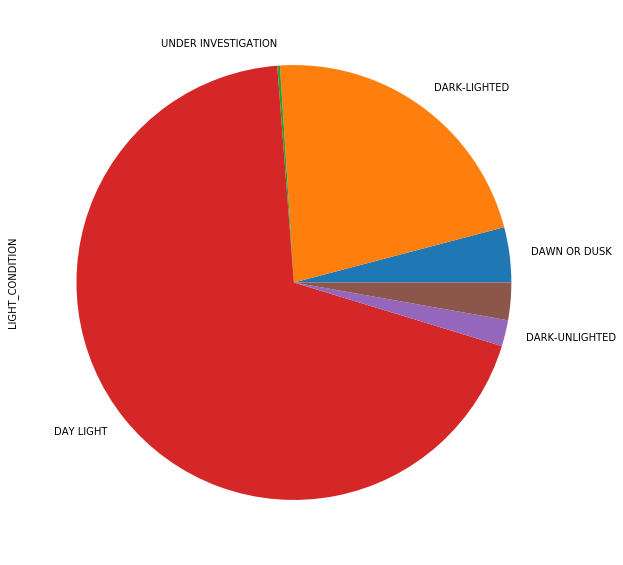

In [13]:
pie_light_condition = df_accidents["LIGHT_CONDITION"].value_counts(sort=False).plot.pie(figsize=(10, 10))
pie_light_condition

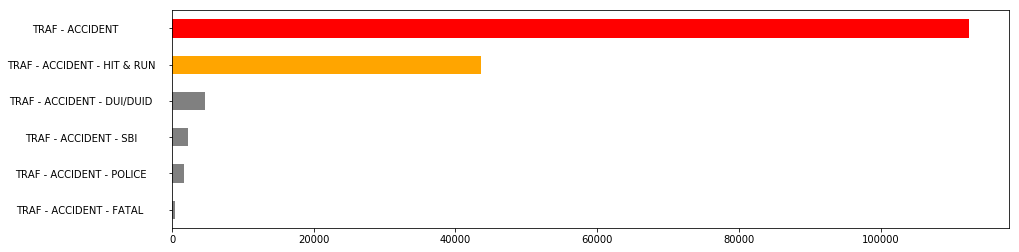

In [14]:
bar_light_condition = df_accidents["TOP_TRAFFIC_ACCIDENT_OFFENSE"].value_counts(sort=False).sort_values().plot.barh(figsize=(15, 4), color=['grey', 'grey', 'grey','grey','orange', 'red'])
bar_light_condition

# 5. Accidents Mapping
In this section we will build a dataframe with letal accidents, sort the data by gravity (number of fatalities and injured) and plot the data on a map thanks to folium library.

In [15]:
!pip install folium
import folium
import math

In [16]:
df_fatal = df_accidents[df_accidents["TOP_TRAFFIC_ACCIDENT_OFFENSE"]=="TRAF - ACCIDENT - FATAL       "].sort_values(by=["FATALITIES","SERIOUSLY_INJURED","OFFENSE_ID"], ascending=False)
df_fatal.head(10)

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,TOP_TRAFFIC_ACCIDENT_OFFENSE,FIRST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,...,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMAN_CONTRIB_FACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2
55842,55843,2.014321e+09,201432051254412,5441,2,TRAF - ACCIDENT - FATAL,2014-06-22 21:37:00,2014-06-22 23:00:00,1900 BLOCK S IRVING ST,3132451.0,...,,,,,2.0,3.0,PASSENGER CAR/VAN,PASSENGER CAR/VAN,PASSENGER CAR/VAN,PASSENGER CAR/VAN
96082,96083,2.016524e+07,2016524254412,5441,2,TRAF - ACCIDENT - FATAL,2016-01-03 14:20:00,2016-01-03 17:16:00,S COLORADO BLVD / E MEXICO AVE,3157410.0,...,STOPPED IN TRAFFIC,OTHER,NO APPARENT,,4.0,2.0,PASSENGER CAR/VAN,PASSENGER CAR/VAN,SUV,SUV
28295,28296,2.013168e+09,201316767154412,5441,2,TRAF - ACCIDENT - FATAL,2013-04-15 00:45:00,2013-04-15 01:42:00,E 17TH AVE / N COLORADO BLVD,3157291.0,...,GOING STRAIGHT,OTHER,NO APPARENT,,2.0,2.0,PASSENGER CAR/VAN,PASSENGER CAR/VAN,PASSENGER CAR/VAN,PASSENGER CAR/VAN
8143,8144,2.018702e+09,201870155354412,5441,2,TRAF - ACCIDENT - FATAL,2018-10-12 23:26:00.000001,2018-10-13 01:19:00,N YORK ST / E 27TH AVE,3151892.0,...,GOING STRAIGHT,OTHER,NO APPARENT,,1.0,2.0,PASSENGER CAR/VAN,PASSENGER CAR/VAN,PASSENGER CAR/VAN,
149262,149263,2.018116e+09,201811644554412,5441,2,TRAF - ACCIDENT - FATAL,2018-02-18 01:29:00,2018-02-18 01:29:00,I70 HWYEB / I225 HWYSB,3187251.0,...,GOING STRAIGHT,OTHER,NO APPARENT,,1.0,2.0,PASSENGER CAR/VAN,PASSENGER CAR/VAN,PASSENGER CAR/VAN,
29291,29292,2.013132e+09,201313183154412,5441,2,TRAF - ACCIDENT - FATAL,2013-03-22 19:55:00,2013-03-22 21:45:00,1300 BLOCK N YOSEMITE ST,3173025.0,...,OTHER,OTHER,NO APPARENT,CROSS/ENTER AT INTERSECTION,1.0,2.0,OTHER,OTHER,OTHER,
19284,19285,2.019424e+09,201942428954412,5441,2,TRAF - ACCIDENT - FATAL,2019-07-07 03:14:00,2019-07-07 03:47:00,3100 BLOCK S COLORADO BLVD,3157493.0,...,,,,,0.0,2.0,PASSENGER CAR/VAN,PASSENGER CAR/VAN,,
15975,15976,2.019279e+09,201927911354412,5441,2,TRAF - ACCIDENT - FATAL,2019-05-04 15:45:00,2019-05-04 15:45:00,S SANTA FE DR / W IOWA AVE,3142948.0,...,MAKING LEFT TURN,OTHER,NO APPARENT,,0.0,2.0,MOTORCYCLE,MOTORCYCLE,,
132037,132038,2.017453e+09,201745301454412,5441,2,TRAF - ACCIDENT - FATAL,2017-07-09 18:00:00,2017-07-09 18:00:00,I25 HWYNB / E HAMPDEN AVE,3163800.0,...,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,2.0,MOTORCYCLE,MOTORCYCLE,,
129900,129901,2.016576e+09,201657559354412,5441,2,TRAF - ACCIDENT - FATAL,2016-09-08 05:20:00,2016-09-08 05:25:00,E 56TH AVE / PENA BLVD,3200517.0,...,,,,STANDING IN ROADWAY,0.0,2.0,OTHER,OTHER,,


In [17]:
m = folium.Map(location=[39.742043,-104.991531], tiles='Stamen Terrain', zoom_start=12)

nb_fatal = df_fatal.shape[0]
nb_map = min(nb_fatal,30)

fatal_lat = df_fatal["GEO_LAT"]
fatal_lon = df_fatal["GEO_LON"]
nb_fatalities = df_fatal["FATALITIES"]
for i in range(0,nb_map):
    lat_i = fatal_lat.iloc[i]
    lon_i = fatal_lon.iloc[i]
    obj_coord = "LAT=" + str(lat_i) +'\n' + 'LON=' + str(lon_i)
    if nb_fatalities.iloc[i] > 2:
        folium.Marker([lat_i, lon_i], popup=obj_coord, icon=folium.Icon(color='red')).add_to(m)
    elif nb_fatalities.iloc[i] == 2:
        folium.Marker([lat_i, lon_i], popup=obj_coord, icon=folium.Icon(color='orange')).add_to(m)
    else :
        folium.Marker([lat_i, lon_i], popup=obj_coord, icon=folium.Icon(color='gray')).add_to(m)
        
m